<a href="https://colab.research.google.com/github/codedmachine111/ML/blob/master/BinaryClassification_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification on Diabetes dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
!pip install opendatasets -q
import opendatasets as od

data_url = "https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database"
od.download(data_url)

Skipping, found downloaded files in "./pima-indians-diabetes-database" (use force=True to force download)


In [ ]:
df = pd.read_csv('/content/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.shape

(768, 9)

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Data Cleaning

In [ ]:
df1 = df.drop_duplicates()
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df1.shape

(768, 9)

In [ ]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#checking for 0 values in 5 columns

print(df1[df1['BloodPressure']==0].shape[0])
print(df1[df1['BMI']==0].shape[0])
print(df1[df1['Glucose']==0].shape[0])
print(df1[df1['Insulin']==0].shape[0])
print(df1[df1['SkinThickness']==0].shape[0])

35
11
5
374
227


In [ ]:
# Replace 0 values in Glucose and BloodPressure with mean values

df1['Glucose'] = df1['Glucose'].replace(0, df['Glucose'].mean())
print(df[df1['Glucose']==0].shape[0])

df1['BloodPressure'] = df1['BloodPressure'].replace(0, df['BloodPressure'].mean())
print(df[df1['BloodPressure']==0].shape[0])

0
0


In [ ]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [ ]:
# skewed distribution

df1['SkinThickness'] = df1['SkinThickness'].replace(0, df['SkinThickness'].median())
df1['BMI'] = df1['BMI'].replace(0, df['BMI'].median())
df1['Insulin'] = df1['Insulin'].replace(0, df['Insulin'].median())
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


# Data Visualization

<Axes: xlabel='Outcome', ylabel='count'>

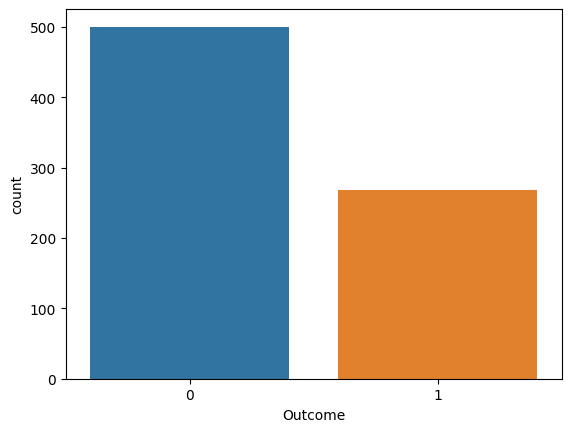

In [ ]:
import seaborn as sns

sns.countplot(x='Outcome', data=df1)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

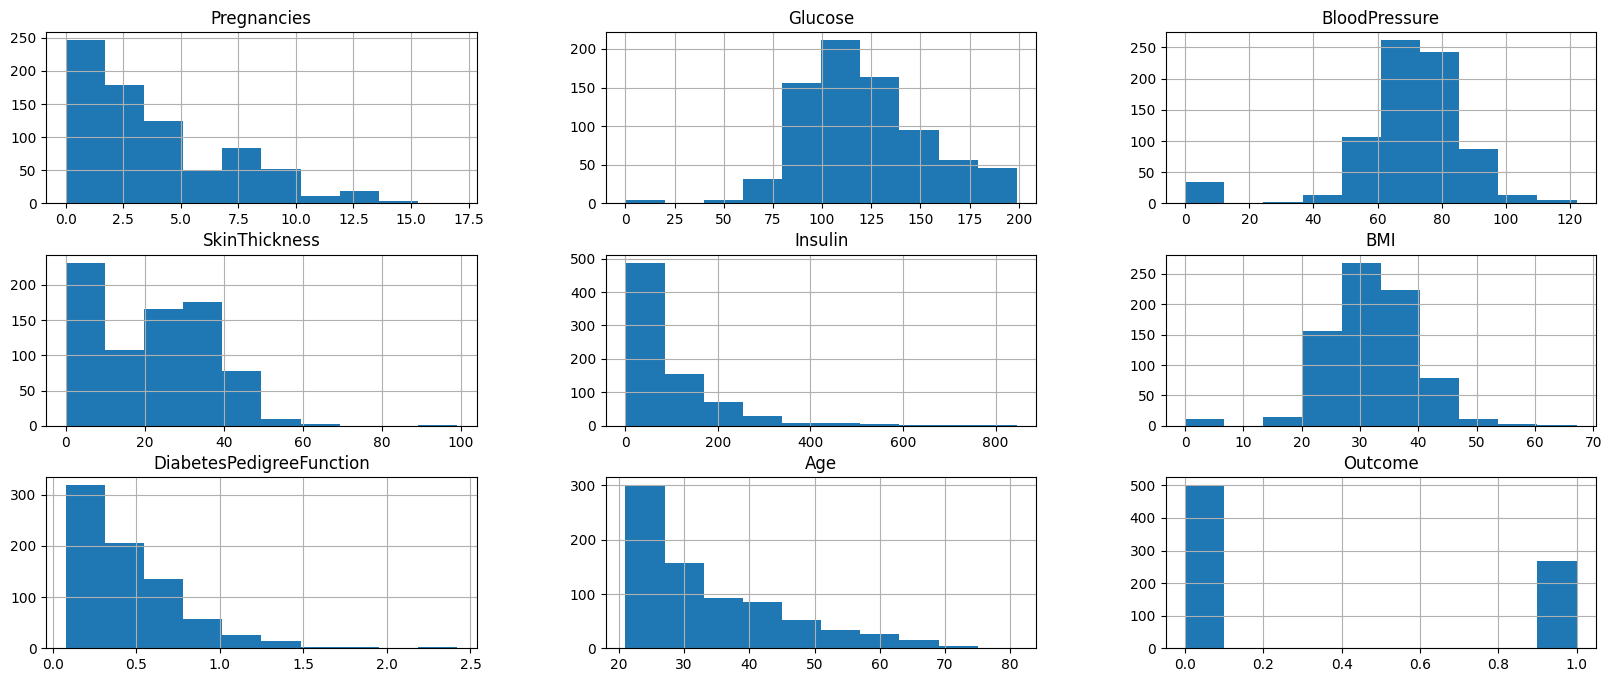

In [ ]:
df.hist(bins=10, figsize=(20,8))

- Glucose and BloodPressure are Normally distributed
- Others are skewed

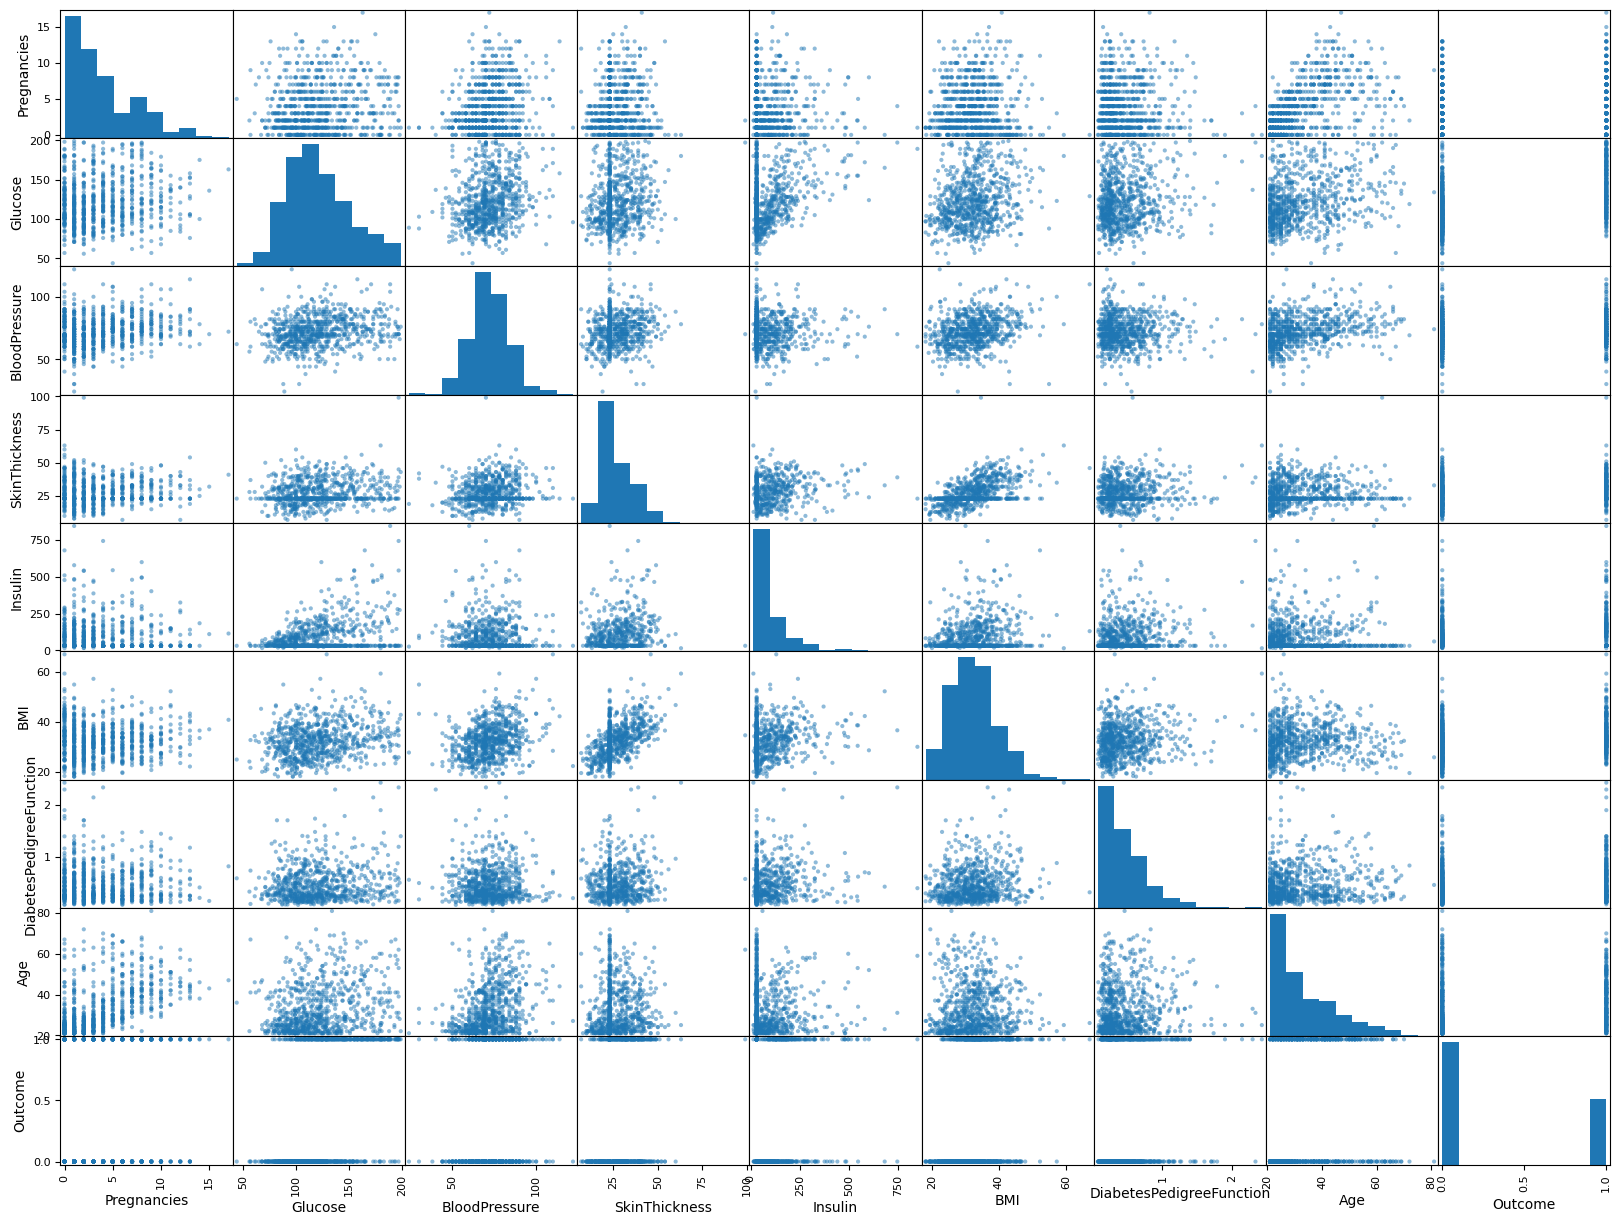

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1, figsize=(20,15));

# Feature Selection

<Axes: >

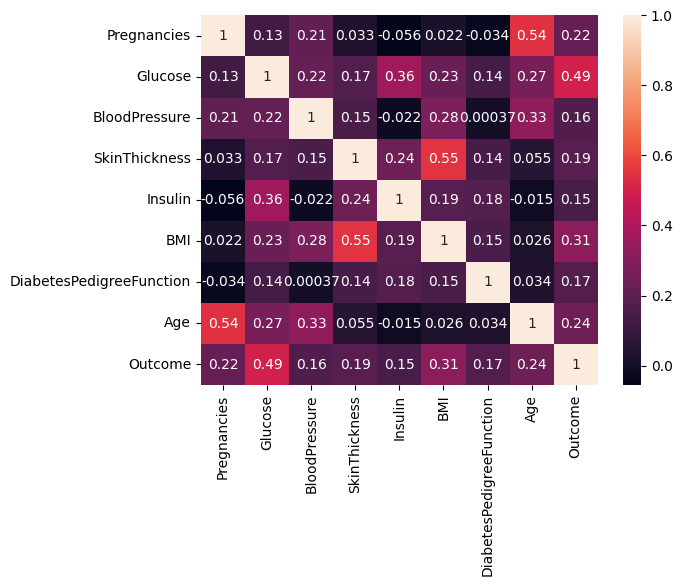

In [ ]:
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
df1 = df1.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis=1)
df1.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148.0,35,33.6,50,1
1,1,85.0,29,26.6,31,0
2,8,183.0,23,23.3,32,1
3,1,89.0,23,28.1,21,0
4,0,137.0,35,43.1,33,1


# Feature scaling

In [ ]:
from sklearn.preprocessing import QuantileTransformer

quantile = QuantileTransformer()

X = quantile.fit_transform(df1)
df_new = quantile.transform(X)
df_new = pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

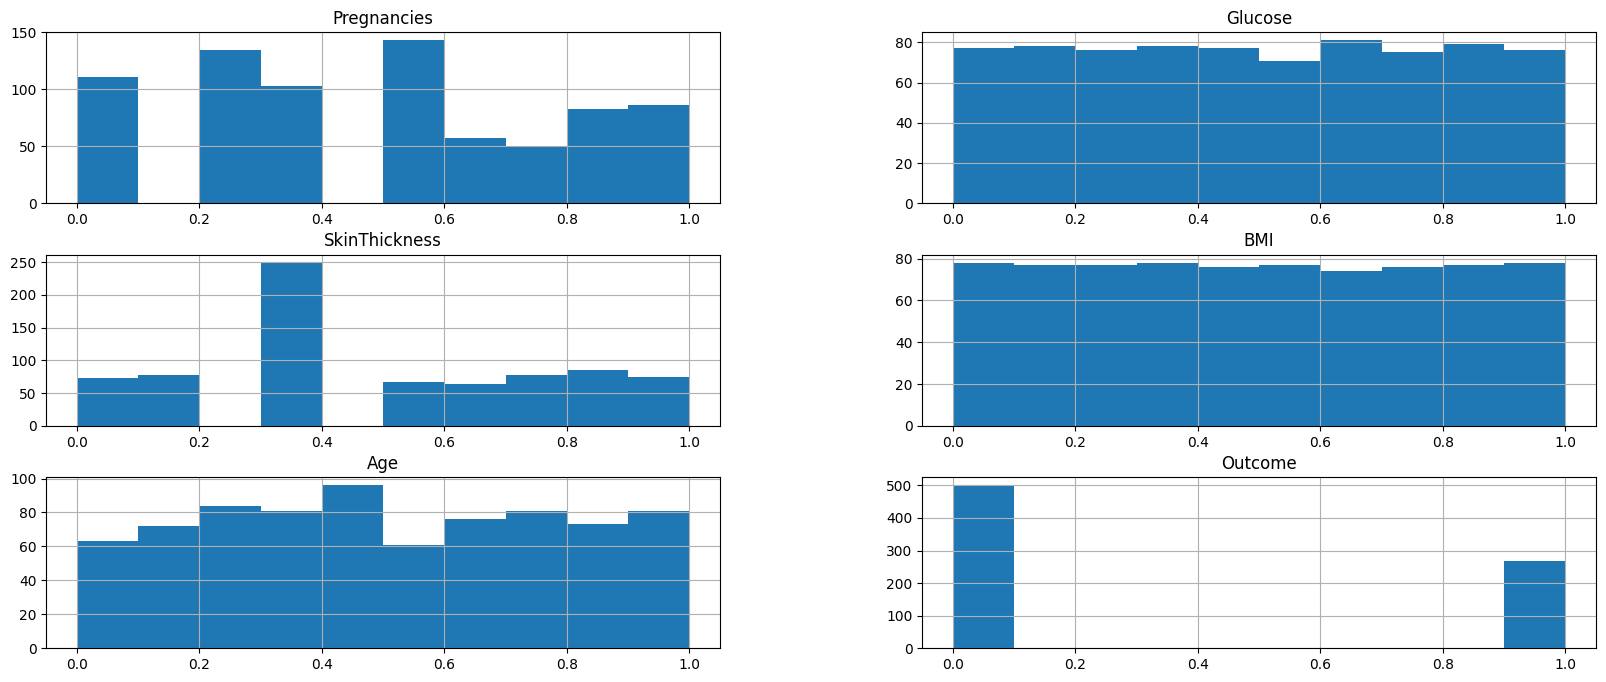

In [ ]:
df_new.hist(figsize=(20,8))

<Axes: xlabel='Age'>

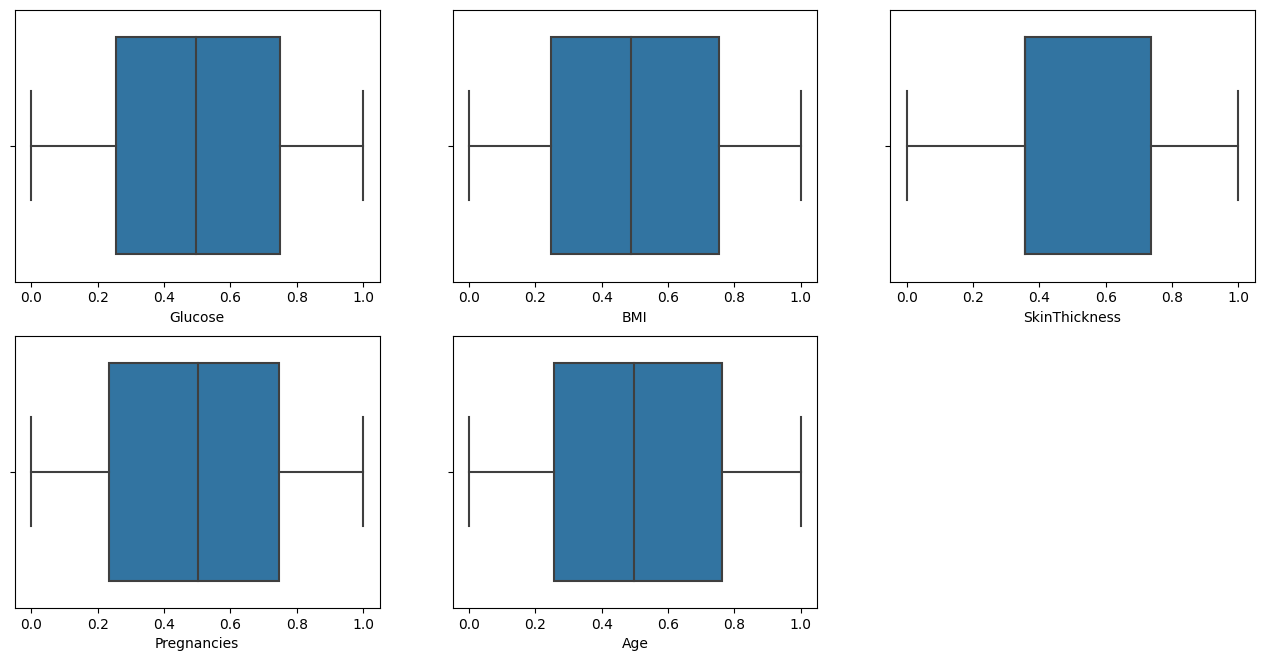

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'], data=df_new)

plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'], data=df_new)

plt.subplot(3,3,3)
sns.boxplot(x=df_new['SkinThickness'], data=df_new)

plt.subplot(3,3,4)
sns.boxplot(x=df_new['Pregnancies'], data=df_new)

plt.subplot(3,3,5)
sns.boxplot(x=df_new['Age'], data=df_new)

In [ ]:
y = df_new['Outcome']
X = df_new.drop(['Outcome'],axis=1)

In [ ]:
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 5) (614,)
(154, 5) (154,)


In [ ]:
model = RandomForestClassifier(n_estimators=1800)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1800)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
acc

0.7467532467532467

# Support vector machines

In [ ]:
from sklearn.svm import SVC

sv = SVC()

sv.get_params

<bound method BaseEstimator.get_params of SVC()>

In [ ]:
sv.fit(X_train, y_train)

sv_pred = sv.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, sv_pred)
cm

array([[81, 18],
       [18, 37]])

In [ ]:
sv_acc = accuracy_score(y_test, sv_pred)
sv_acc

0.7662337662337663